Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

Загрузка файла с данными

In [2]:
data = pd.read_csv('credit_scoring_dataset.csv', index_col = 0)

# EDA

Обзорная таблица

In [3]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


Количество строк и переменных

In [4]:
data.shape

(150000, 11)

Типы переменных - ни одной текстовой

In [5]:
data.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

Проверка пропущенных значений. Обнаружены у переменных MonthlyIncome и NumberOfDependents

In [6]:
data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

Заполнение пропущенных значений медианной

In [7]:
data['MonthlyIncome'].fillna(data['MonthlyIncome'].median(), inplace = True)
data['NumberOfDependents'].fillna(data['NumberOfDependents'].median(), inplace = True)

Повторная проверка пропущенных значений

In [8]:
data.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

Описательная статистика данных. Настораживает большое стандартное отклонение в переменной "Общий баланс средств" и большое максимальное значение в переменных количества дней просрочки и количества займов. Также странным выглядит нулевой возраст клиента

In [9]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.418455e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.289040e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Проверка переменной "Общий баланс средств". Странных выбросов нет. Получается, такова специфика - абсолютное большинство клиентов имеет низкий баланс на счете и малая часть - высокий

In [10]:
data_sorted = data.sort_values('RevolvingUtilizationOfUnsecuredLines', ascending=False)
data_sorted[:20]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
85489,0,50708.0,55,0,0.221757,38000.0,7,0,2,0,0.0
31414,0,29110.0,58,0,0.402560,10000.0,7,0,1,0,0.0
16956,0,22198.0,38,0,2312.000000,5400.0,5,0,2,0,0.0
149160,0,22000.0,38,0,1.080020,3973.0,7,0,2,0,3.0
149279,0,20514.0,42,0,0.062102,9902.0,1,1,0,0,2.0
117315,0,18300.0,45,0,0.221582,12500.0,5,0,1,0,2.0
21978,0,17441.0,51,1,0.354072,14770.0,14,0,2,0,0.0
124533,0,13930.0,45,0,4902.000000,5400.0,4,0,2,0,0.0
72592,0,13498.0,38,0,0.347428,4800.0,6,0,1,0,2.0
71705,0,13400.0,43,0,0.995801,5000.0,11,0,1,0,1.0


Проверка переменной "Количество просрочек 30-59 дней за последние 2 года". Очень резкий переход с неадекватных значений 96-98 до более адекватных 0-13. При этом почти у всех этих клиентов нет открытых кредитов. Лучше эти строки удалить

In [11]:
data_sorted = data.sort_values('NumberOfTime30-59DaysPastDueNotWorse', ascending=False)
data_sorted[260:280]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
98603,0,1.000000,52,98,0.000000,9016.0,0,98,0,98,2.0
136682,1,1.000000,34,98,0.000000,3144.0,0,98,0,98,2.0
81460,1,1.000000,30,98,0.000000,800.0,0,98,0,98,0.0
73213,1,1.000000,32,98,0.000000,1800.0,0,98,0,98,0.0
94106,1,1.000000,34,96,0.000000,3500.0,0,96,0,96,1.0
120049,0,1.000000,46,96,0.051765,4616.0,0,96,0,96,0.0
84167,1,1.000000,29,96,0.000000,2800.0,0,96,0,96,2.0
69478,1,1.000000,33,96,0.008047,4100.0,0,96,0,96,0.0
41944,1,1.000000,26,96,0.000000,5400.0,0,96,0,96,0.0
80533,1,0.998833,48,13,0.348064,12083.0,15,0,1,0,3.0


Проверка переменных количества кредитов. Оказывается, это не выброс - таких значений много.

In [12]:
data_sorted = data.sort_values('NumberOfOpenCreditLinesAndLoans', ascending=False)
data_sorted[:30]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
30587,0,0.003032,53,0,5.967504,8000.0,58,0,54,0,0.0
137095,1,0.050855,42,0,0.100814,42156.0,57,0,1,0,2.0
22683,0,0.020452,51,0,0.032213,3600.0,57,0,0,0,0.0
107427,0,0.013016,48,0,0.025088,7373.0,56,0,0,0,0.0
51026,0,0.020226,70,0,0.074935,8900.0,56,0,0,0,2.0
66979,0,0.028601,62,0,0.711833,5416.0,54,0,5,0,0.0
54115,0,0.052349,60,0,0.637685,12800.0,54,0,2,0,2.0
105480,0,0.477322,49,0,6.006888,9000.0,54,0,7,0,3.0
16537,0,0.098127,61,0,0.323779,10500.0,54,0,2,0,0.0
112934,0,0.911758,67,0,0.865500,20750.0,53,0,5,0,3.0


Значит, удаляем только строки с неадекватным значением количества фактов просрочки за последние 2 года

In [13]:
data_altered = data[data['NumberOfTime30-59DaysPastDueNotWorse'] < 15]

Нулевой возраст только у одной строки. Удалим ее

In [14]:
data_altered = data_altered[data_altered['age'] > 0]

Описательная статистика обновленной таблицы

In [15]:
data_altered.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149730.000000,149730.000000,149730.000000,149730.000000,149730.000000,1.497300e+05,149730.000000,149730.000000,149730.000000,149730.000000,149730.000000
mean,0.065979,6.057542,52.327984,0.245789,353.631316,6.423097e+03,8.467949,0.090456,1.020063,0.064823,0.738142
std,0.248246,249.980364,14.754371,0.697779,2039.601344,1.290112e+04,5.138107,0.485529,1.129961,0.330074,1.107373
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029771,41.000000,0.000000,0.175994,3.915000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153488,52.000000,0.000000,0.367119,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.555592,63.000000,0.000000,0.870023,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,13.000000,329664.000000,3.008750e+06,58.000000,17.000000,54.000000,11.000000,20.000000


Корреляционная матрица. Целевая переменная наиболее зависима от количества фактов просрочки 90+ за последние 2 года. И наименее зависима от баланса средств. Очевидно, что зависимы переменные количества открытых кредитов зависимы друг от друга, как и переменные числа фактов просрочки

In [16]:
corr = data_altered.corr()
corr.style.background_gradient(cmap='coolwarm')

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1,-0.00174383,-0.112979,0.274553,-0.0070694,-0.0165306,-0.024232,0.314535,-0.00395713,0.26813,0.0483203
RevolvingUtilizationOfUnsecuredLines,-0.00174383,1,-0.00595545,-0.00281846,0.0039551,0.00650611,-0.0113679,-0.00180752,0.00620665,-0.00244144,0.00118046
age,-0.112979,-0.00595545,1,-0.071845,0.0238567,0.0271798,0.144742,-0.0823918,0.0312803,-0.0698538,-0.217236
NumberOfTime30-59DaysPastDueNotWorse,0.274553,-0.00281846,-0.071845,1,0.00349232,2.68358e-05,0.0800728,0.218149,0.0427565,0.305879,0.0656107
DebtRatio,-0.0070694,0.0039551,0.0238567,0.00349232,1,-0.0180698,0.0491828,-0.00984819,0.119862,-0.00419555,-0.0446139
MonthlyIncome,-0.0165306,0.00650611,0.0271798,2.68358e-05,-0.0180698,1,0.0865742,-0.0177579,0.116041,-0.00991155,0.0661927
NumberOfOpenCreditLinesAndLoans,-0.024232,-0.0113679,0.144742,0.0800728,0.0491828,0.0865742,1,-0.0938693,0.432669,-0.0219069,0.0731544
NumberOfTimes90DaysLate,0.314535,-0.00180752,-0.0823918,0.218149,-0.00984819,-0.0177579,-0.0938693,1,-0.0624711,0.294638,0.0313353
NumberRealEstateLoansOrLines,-0.00395713,0.00620665,0.0312803,0.0427565,0.119862,0.116041,0.432669,-0.0624711,1,-0.0206955,0.128962
NumberOfTime60-89DaysPastDueNotWorse,0.26813,-0.00244144,-0.0698538,0.305879,-0.00419555,-0.00991155,-0.0219069,0.294638,-0.0206955,1,0.0376331


Среднее значение переменной NumberOfTimes90DaysLate в зависимости от значения целевой переменной

In [17]:
data.groupby('SeriousDlqin2yrs')['NumberOfTimes90DaysLate'].mean()

SeriousDlqin2yrs
0    0.135225
1    2.091362
Name: NumberOfTimes90DaysLate, dtype: float64

Уберем переменную числа открытых кредитов под залог жилья

In [18]:
del data_altered['NumberRealEstateLoansOrLines']

Итоговая таблица состоит из 10 переменных и 149730 строк

In [19]:
data_altered.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149730.000000,149730.000000,149730.000000,149730.000000,149730.000000,1.497300e+05,149730.000000,149730.000000,149730.000000,149730.000000
mean,0.065979,6.057542,52.327984,0.245789,353.631316,6.423097e+03,8.467949,0.090456,0.064823,0.738142
std,0.248246,249.980364,14.754371,0.697779,2039.601344,1.290112e+04,5.138107,0.485529,0.330074,1.107373
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029771,41.000000,0.000000,0.175994,3.915000e+03,5.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153488,52.000000,0.000000,0.367119,5.400000e+03,8.000000,0.000000,0.000000,0.000000
75%,0.000000,0.555592,63.000000,0.000000,0.870023,7.400000e+03,11.000000,0.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,13.000000,329664.000000,3.008750e+06,58.000000,17.000000,11.000000,20.000000


# Визуализация данных

Оценим визуально зависимость целевой переменной от, например, числа фактов просрочки 90+ за последние 2 года

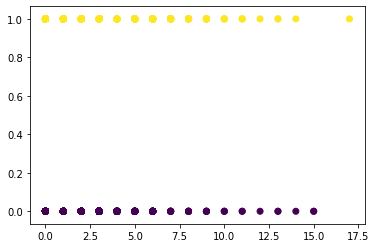

In [20]:
import matplotlib.pyplot as plt

plt.scatter(data_altered['NumberOfTimes90DaysLate'], data_altered['SeriousDlqin2yrs'], c=data_altered['SeriousDlqin2yrs'])

Какой-либо ценной информации извлечь не удалось

# Логистическая регрессия

Задаем константы

In [21]:
seed = 42
test_size = .25

Формируем вектор целевой переменной 'y' и матрицу объект-признак 'x'

In [22]:
y = data_altered['SeriousDlqin2yrs']
X = data_altered.drop('SeriousDlqin2yrs', axis = 1)

Как было сказано выше, в данных отсутствуют текстовые категориальные переменные. Переходим к формированию обучающей и тестовой выборкам

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = test_size, random_state = seed)

Проведем масштабирование независимых переменных

In [24]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(Xtrain)

Xtrain = pd.DataFrame(ss.transform(Xtrain), columns = X.columns)
Xtest = pd.DataFrame(ss.transform(Xtest), columns = X.columns)

Построим модель на обучающей выборке и сделаем прогнозы на тестовой

In [25]:
model = LogisticRegression()
model.fit(Xtrain, ytrain)
pred_test = model.predict(Xtest)

Коэффициенты:

In [26]:
coef_table = pd.DataFrame({'features' : list(X.columns), 'weights' : list(model.coef_[0])})
coef_table
# coef_table.sort_values(by='weights')

,features,weights
0,RevolvingUtilizationOfUnsecuredLines,-0.038715
1,age,-0.411532
2,NumberOfTime30-59DaysPastDueNotWorse,0.397270
3,DebtRatio,-0.039480
4,MonthlyIncome,-0.266974
5,NumberOfOpenCreditLinesAndLoans,0.031614
6,NumberOfTimes90DaysLate,0.404372
7,NumberOfTime60-89DaysPastDueNotWorse,0.252996
8,NumberOfDependents,0.058606


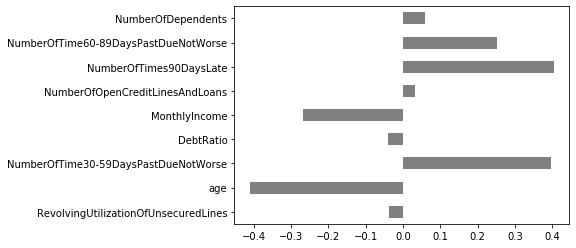

In [30]:
pd.Series(model.coef_[0], index = Xtrain.columns).plot(kind = 'barh', color = 'grey')
plt.show()

Чем старше клиент и чем выше у него месячный доход, тем ниже вероятность ухода в просрочку 90+. Если же у клиента в прошлые два года наблюдалась любая просрочка - это увеличивает вероятность очередного ухода в просрочку 90+ в будущем.

Сэмпл вектора предсказанных значений:

In [31]:
pred_test[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [32]:
print('Из ' + str(pred_test.size) + ' строк тестовой выборки просрочка 90+ была предсказана ' + str(pred_test.sum()) + ' раз'\
     + ', что составляет ' + str(round(round(pred_test.sum() / pred_test.size, 3) * 100, 2)) + '%')

Из 37433 строк тестовой выборки просрочка 90+ была предсказана 635 раз, что составляет 1.7%


При этом accuracy очень высокий

In [33]:
accuracy_score(ytest, pred_test)

0.9371143109021451

Баланс выборки сильно смещен в сторону отсутствия просрочки 90+

In [34]:
y.value_counts()

0    139851
1      9879
Name: SeriousDlqin2yrs, dtype: int64

На тестовой выборке:

In [35]:
ytest.value_counts()

0    34920
1     2513
Name: SeriousDlqin2yrs, dtype: int64

Посмотрим на матрицу ошибок

In [38]:
from sklearn import metrics

print('Confusion matrix:', '\n', metrics.confusion_matrix(ytest, pred_test))
print('Recall:', metrics.recall_score(ytest, pred_test))
print('Precision:', metrics.precision_score(ytest, pred_test))
print('AUC-ROC Score:', metrics.roc_auc_score(ytest, pred_test))

Confusion matrix: 
 [[34682   238]
 [ 2116   397]]
Recall: 0.1579785117389574
Precision: 0.6251968503937008
AUC-ROC Score: 0.5755814666369472


Низкий Recall и AUC-ROC Score говорят о том, что модель плохо определяет клиентов, которые уйдут в просрочку 90+. Попробуем другую модель

# Бустинг

In [39]:
from catboost import CatBoostClassifier, Pool

train_set = Pool(Xtrain, ytrain)
test_set = Pool(Xtest, ytest)

In [40]:
gbm = CatBoostClassifier(iterations=100,
                          depth=2,
                          learning_rate=0.1,
                          loss_function='Logloss',
                          eval_metric='AUC',
                          verbose=False)
gbm.fit(train_set, eval_set=test_set)
gbm_preds = gbm.predict_proba(Xtest)

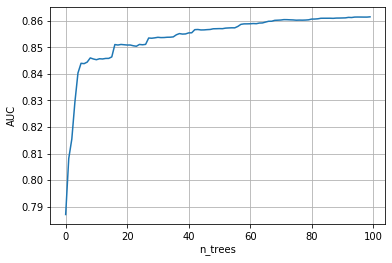

In [41]:
eval_metrics = gbm.get_evals_result()
plt.plot(eval_metrics['validation']['AUC'])
plt.xlabel('n_trees')
plt.ylabel('AUC')
plt.grid()

In [42]:
gbm_classes = (gbm_preds[:, 1] > 0.3)
print('Precision: ', metrics.precision_score(ytest, gbm_classes))
print('Recall: ', metrics.recall_score(ytest, gbm_classes))
print('AUC-ROC Score: ', metrics.roc_auc_score(ytest, gbm_preds[:, 1]))

Precision:  0.4690831556503198
Recall:  0.3501790688420215
AUC-ROC Score:  0.861449084462969


Методом градиентного бустинга удалось значительно увеличить Recall и площадь под ROC-кривой. Посмотрим на коэффициенты

In [43]:
coef_table = pd.DataFrame({'features' : list(X.columns), 'importances' : list(gbm.get_feature_importance())})
coef_table

,features,importances
0,RevolvingUtilizationOfUnsecuredLines,39.094724
1,age,8.507561
2,NumberOfTime30-59DaysPastDueNotWorse,17.168337
3,DebtRatio,3.253270
4,MonthlyIncome,1.852595
5,NumberOfOpenCreditLinesAndLoans,3.972097
6,NumberOfTimes90DaysLate,16.784628
7,NumberOfTime60-89DaysPastDueNotWorse,9.366788
8,NumberOfDependents,0.000000


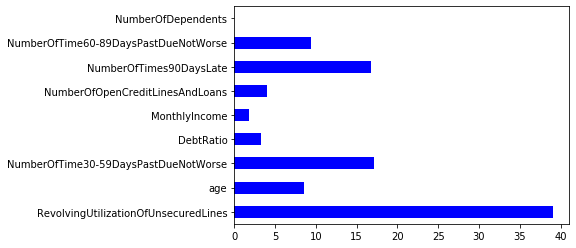

In [46]:
pd.Series(gbm.get_feature_importance(), index = X.columns).plot(kind = 'barh', color = 'blue')
plt.show()

Данная модель показала, что наиважнейший параметр - текущий баланс на счете клиента

Попробуем увеличить число деревьев

In [48]:
gbm = CatBoostClassifier(iterations=200,
                          depth=2,
                          learning_rate=0.1,
                          loss_function='Logloss',
                          eval_metric='AUC',
                          verbose=False)
gbm.fit(train_set, eval_set=test_set)
gbm_preds = gbm.predict_proba(Xtest)

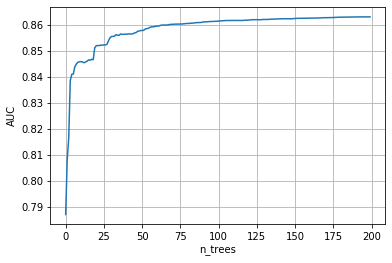

In [49]:
eval_metrics = gbm.get_evals_result()
plt.plot(eval_metrics['validation']['AUC'])
plt.xlabel('n_trees')
plt.ylabel('AUC')
plt.grid()

In [52]:
gbm_classes = (gbm_preds[:, 1] > 0.3)
print('Precision: ', round(metrics.precision_score(ytest, gbm_classes), 2))
print('Recall: ', round(metrics.recall_score(ytest, gbm_classes), 2))
print('AUC-ROC Score: ', round(metrics.roc_auc_score(ytest, gbm_preds[:, 1]), 2))

Precision:  0.47
Recall:  0.37
AUC-ROC Score:  0.86


Значительного прироста качества не произошло, но Recall увеличился на 2%. Подберем наиболее сбалансированный порог отсечения

In [53]:
i = .1
while i <= .9:
    gbm_classes = (gbm_preds[:, 1] > i)
    print('For threshold =', str(i))
    print('Precision: ', round(metrics.precision_score(ytest, gbm_classes), 2))
    print('Recall: ', round(metrics.recall_score(ytest, gbm_classes), 2))
    print()
    i += .1

For threshold = 0.1
Precision:  0.28
Recall:  0.65

For threshold = 0.2
Precision:  0.4
Recall:  0.49

For threshold = 0.30000000000000004
Precision:  0.47
Recall:  0.37

For threshold = 0.4
Precision:  0.53
Recall:  0.27

For threshold = 0.5
Precision:  0.59
Recall:  0.19

For threshold = 0.6
Precision:  0.67
Recall:  0.12

For threshold = 0.7
Precision:  0.74
Recall:  0.06

For threshold = 0.7999999999999999
Precision:  0.87
Recall:  0.01

For threshold = 0.8999999999999999
Precision:  0.0
Recall:  0.0



При пороге 0.2 почти половина реально ушедших в просрочку 90+ клиентов предсказывается нашей моделью, 40% из предсказанных действительно уходят в просрочку 90+